In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Read Image

In [3]:
image_bgr = cv2.imread('video_frame_00077.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

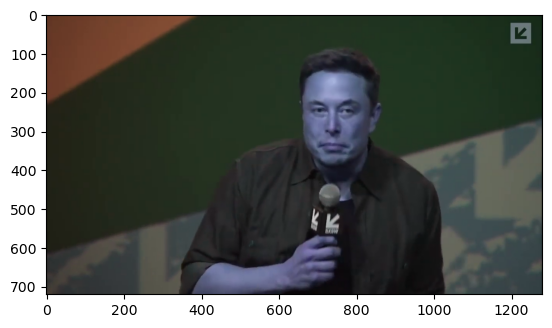

In [4]:
plt.imshow(image_bgr)

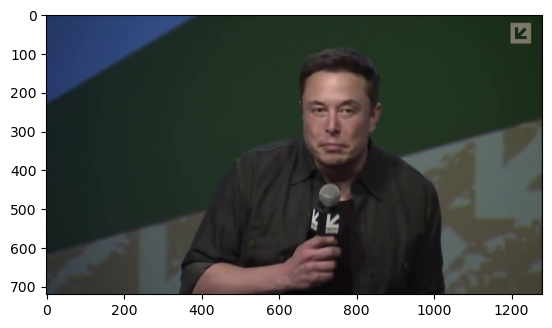

In [5]:
plt.imshow(image_rgb)

### Step 2: Detect faces in image

In [7]:
from face_alignment.detection.sfd import FaceDetector

In [8]:
face_detector = FaceDetector('cuda')

In [10]:
faces = face_detector.detect_from_image(image_bgr)

In [11]:
print(faces[0])

[664.9477396  143.18571472 829.59143162 385.01728821   0.99999106]


In [15]:
face = faces[0].astype(int)

In [16]:
top_left_x, top_left_y, bottom_right_x, bottom_right_y, confidence = face

In [20]:
image_with_landmark_single_face = cv2.rectangle(
    image_rgb, 
    (top_left_x, top_left_y), 
    (bottom_right_x, bottom_right_y), 
    (0, 0, 0), 
    thickness=2
)

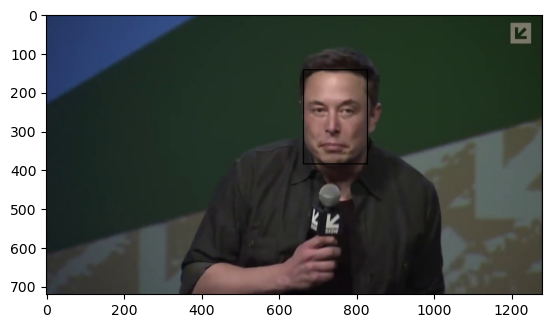

In [21]:
plt.imshow(image_with_landmark_single_face)

### Step 3: Detect landmarks for a single image

In [22]:
from face_alignment import FaceAlignment, LandmarksType

In [23]:
face_aligner = FaceAlignment(landmarks_type=LandmarksType.TWO_D)

In [34]:
landmarks = face_aligner.get_landmarks_from_image(image_bgr, detected_faces=[face[:4]])

In [35]:
landmarks[0][0]

array([660., 243.], dtype=float32)

In [36]:
len(landmarks[0])

68

In [42]:
for landmark_point in landmarks[0]:
    image_with_landmark_single_face = cv2.circle(
        image_with_landmark_single_face, 
        tuple(landmark_point.astype(int)), 
        radius = 5, 
        color = [155, 155, 155], 
        thickness = 1
    )

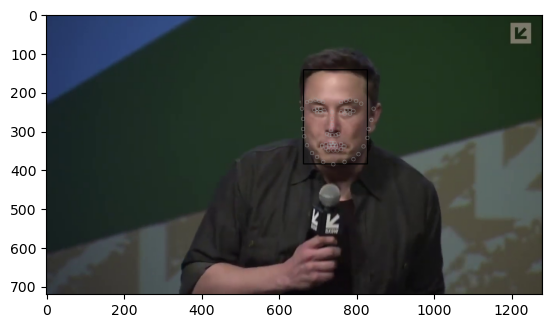

In [43]:
plt.imshow(image_with_landmark_single_face)